# Figures

This notebook contains all the figures in the "Mapping the acoustic environment across an urban-rural gradient in Innsbruck, Austria" publication.

#### global import statements

In [1]:
from matplotlib import pyplot
%matplotlib inline
import pyproj

In [2]:
from django.db import connection

#### set coordinate systems

In [3]:
austria_mgd = pyproj.Proj(init='epsg:31254')

#### function declarations

In [4]:
def get_geodataframe(queryset, crs=austria_mgd):
    query = queryset.query.sql_with_params()
    return geopandas.read_postgis(query[0], connection, 
                                   geom_col='geometry', 
                                   params=query[1], 
                                   index_col='id',
                                   crs=crs)

## figure 1 — study area

#### import statements

In [5]:
import numpy
from database.models import Site
from geo.models import SampleLocation, Boundary
import geopandas

In [6]:
boundary = get_geodataframe(Boundary.objects.filter(name__exact='study area'))
generated = get_geodataframe(SampleLocation.objects.all())
acutal = get_geodataframe(Site.objects.filter(id__lte=30))

osm roads data

In [7]:
roads_filpath = "/Users/Jake/Documents/research/alpine soundscapes/GIS/Flat_files/shapefile/highway.shp"
roads = geopandas.read_file(roads_filpath)

In [8]:
motorway = roads[roads.Type == 'motorway']
primary = roads[roads.Type == 'primary']
secondary = roads[roads.Type == 'secondary']
tertiary = roads[roads.Type == 'tertiary']
residential = roads[roads.Type == 'residential']

In [9]:
roads.Type.unique()

array(['primary', 'residential', 'footway', 'service', 'path', 'motorway',
       'track', 'unclassified', 'tertiary', 'cycleway', 'primary_link',
       'secondary', 'motorway_link', 'living_street', 'steps',
       'tertiary_link', 'pedestrian', 'secondary_link', 'construction',
       'platform', 'services', 'rest_area', 'bus_stop', 'escape',
       'elevator', 'proposed', 'crossing'], dtype=object)

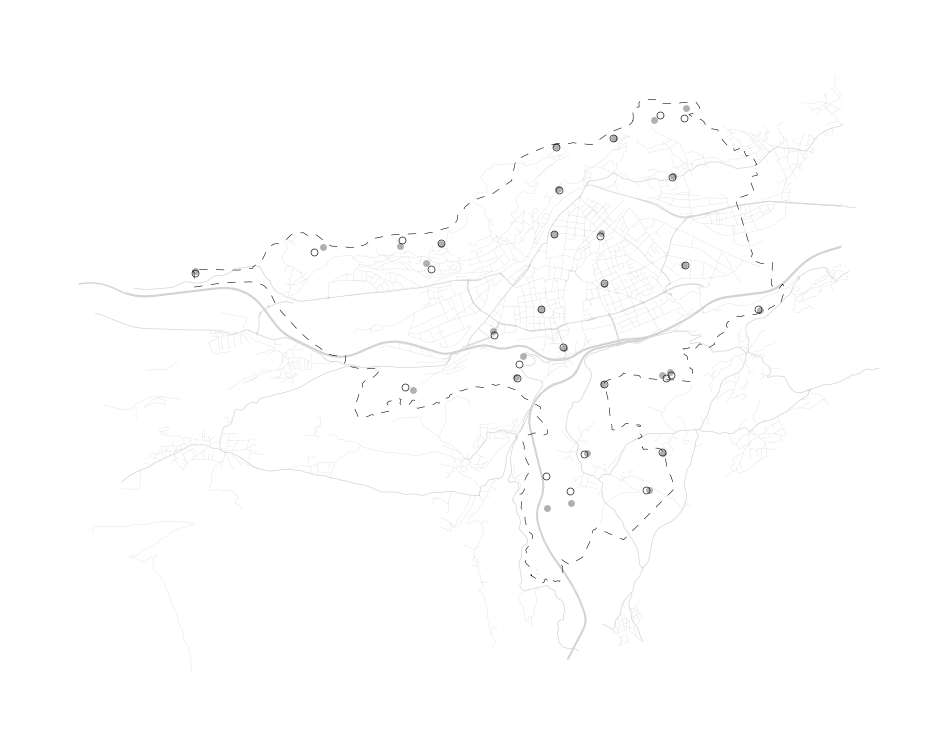

In [10]:
figure1, ax = pyplot.subplots()
figure1.set_dpi(192)
figure1.set_figheight(12)
figure1.set_figwidth(12)
ax.set_aspect('equal')
r0 = motorway.plot(ax=ax, color='lightgray', linewidth=1)
r1 = primary.plot(ax=ax, color='lightgray', linewidth=0.5)
r2 = secondary.plot(ax=ax, color='lightgray', linewidth=0.5)
r3 = tertiary.plot(ax=ax, color='lightgray', linewidth=0.2)
r4 = residential.plot(ax=ax, color='lightgray', linewidth=0.2)
p0 = boundary.plot(ax=ax, facecolor='none', edgecolor='black', linestyle='--', linewidth=0.4, label='study area')
p1 = generated.plot(ax=ax, color='black', marker='o', alpha=0.3, markersize=5, markeredgecolor='none', label='generated')
p2 = acutal.plot(ax=ax, color='black', marker='o', alpha=0.9, markersize=5, markerfacecolor='none', label='actual')
ax.set_frame_on(False)
ax.tick_params(axis='both', 
               bottom=False, right=False, top=False, left=False,
               labelbottom=False, labelleft=False)
#ax.legend()

In [11]:
#figure1.set_figheight(20)
#figure1.set_figwidth(20)
#figure1.savefig("/Users/Jake/Desktop/figure1.png")